In [39]:
# Imports
# json
import json
import os
import matplotlib.pyplot as plt
import pandas as pd

# Load JSON files
Including the road network and vehicle data

In [40]:
# file names
network='network.json'
vehicles='Custom_2_20.json'

In [41]:
# load both json files
with open('network.json') as f:
    network = json.load(f)


In [42]:

vData=[]
with open(vehicles) as f:
    vData = json.load(f)

In [43]:
print(network)

{'segments': [{'segmentId': 0, 'waypoints': [{'x': -1.2498822212219238, 'y': -23.532577514648438}, {'x': -1.3145043849945068, 'y': 2.887786865234375}, {'x': -1.3145043849945068, 'y': 2.887786865234375}, {'x': -1.3145043849945068, 'y': 4.870416641235352}]}, {'segmentId': 1, 'waypoints': [{'x': -3.383314847946167, 'y': 6.853006362915039}, {'x': -11.14147663116455, 'y': 13.490543365478516}, {'x': -3.986745834350586, 'y': 27.972393035888672}]}, {'segmentId': 2, 'waypoints': [{'x': -0.36625856161117554, 'y': 6.680445194244385}, {'x': 3.9438695907592773, 'y': 13.404243469238281}, {'x': 3.9438695907592773, 'y': 13.404243469238281}, {'x': -2.004106044769287, 'y': 28.57588768005371}, {'x': -2.004106044769287, 'y': 28.57588768005371}]}, {'segmentId': 3, 'waypoints': [{'x': -3.0, 'y': 30.385942459106445}, {'x': -3.1724135875701904, 'y': 42.28183364868164}]}, {'segmentId': 4, 'waypoints': [{'x': 31.494464874267578, 'y': 43.47181701660156}, {'x': 34.87046813964844, 'y': -24.5533447265625}]}]}


In [44]:
print(vData)    

[{'id': 0, 'path_norm': {'path': [{'id': 0, 'init_cost': 27.0, 'end_cost': 0.0, 'init_density': 0.0, 'end_density': 0.0}, {'id': 2, 'init_cost': 23.0, 'end_cost': 0.3543260395526886, 'init_density': 0.0, 'end_density': 5.0}, {'id': 3, 'init_cost': 11.0, 'end_cost': 0.38859817385673523, 'init_density': 0.0, 'end_density': 5.0}], 'path_alt': []}, 'path_cav_init': {'path': [{'id': 0, 'init_cost': 28.0, 'end_cost': 0.0, 'init_density': 0.0, 'end_density': 0.0}, {'id': 2, 'init_cost': 21.0, 'end_cost': 0.0, 'init_density': 0.0, 'end_density': 0.0}, {'id': 3, 'init_cost': 11.0, 'end_cost': 0.0, 'init_density': 0.0, 'end_density': 0.0}], 'path_alt': []}, 'path_cav_end': {'path': [{'id': 0, 'init_cost': 28.0, 'end_cost': 0.3547012209892273, 'init_density': 0.0, 'end_density': 5.0}, {'id': 2, 'init_cost': 21.0, 'end_cost': 100.0, 'init_density': 0.0, 'end_density': 2.0}, {'id': 3, 'init_cost': 11.0, 'end_cost': 0.0, 'init_density': 0.0, 'end_density': 0.0}], 'path_alt': []}, 'path_norm_segments

In [45]:
segments = network['segments']
waypoints = [segment['waypoints'] for segment in segments]

In [46]:
# dictionary of segments and waypoints
segments=network['segments']

In [47]:
def plotSegment(segment, segmentpath,color='b',c2='g'):
    # extract the waypoints
    waypoints = segment['waypoints']
    #init
    init_cost = segmentpath['init_cost']
    init_density = segmentpath['init_density']
    #end values
    end_cost = segmentpath['end_cost']
    end_density = segmentpath['end_density']
    # extract the coordinates of the waypoints
    coords = [(waypoint['x'], waypoint['y']) for waypoint in waypoints]
    # unpack the coordinates into two lists
    x, y = zip(*coords)
    
    # places the init cost and density
    # plt.text(x[0], y[0], f'Init Cost: {init_cost} \n', fontsize=8, ha='right',color=color)
    plt.text(x[0], y[0]+3, f'Init Density: {init_density}\n', fontsize=8, ha='right',color=color)
    # places the end cost and density
    # plt.text(x[-1], y[-1], f'End Cost: {end_cost}\n', fontsize=8, ha='left',color=c2)
    plt.text(x[-1], y[-1]+3, f'End Density: {end_density}\n', fontsize=8, ha='left',color=c2)
    
    # color
    
    
    # plot the segment
    plt.plot(x, y, 'b-', color=color)
    # plot the waypoints
    plt.plot(x, y, 'ro', color=color)

In [48]:
def plotPath(path,c,c2):
    for s in path:
        print(s)
        plotSegment(segments[s['id']],s,c,c2)

In [49]:
#  plot 2 paths

In [50]:
def plotPaths(p1,p2):
    plotPath(p1,'red','orange')
    plotPath(p2,'blue','green')
    
    # plt.show()

In [51]:
print(vData[0]['path_norm']['path'])

[{'id': 0, 'init_cost': 27.0, 'end_cost': 0.0, 'init_density': 0.0, 'end_density': 0.0}, {'id': 2, 'init_cost': 23.0, 'end_cost': 0.3543260395526886, 'init_density': 0.0, 'end_density': 5.0}, {'id': 3, 'init_cost': 11.0, 'end_cost': 0.38859817385673523, 'init_density': 0.0, 'end_density': 5.0}]


In [52]:
plt.figure(figsize=(10, 10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

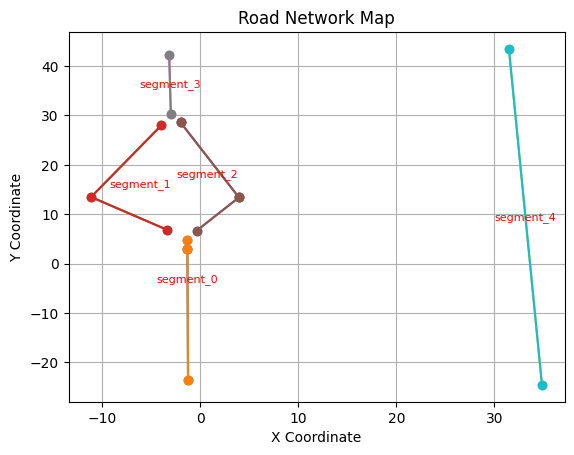

In [53]:
x_min=0
x_max=0
y_min=0
y_max=0
for segment_waypoints in waypoints:
    x_coords = [point['x'] for point in segment_waypoints]
    y_coords = [point['y'] for point in segment_waypoints]
    # Update the min and max values
    x_min = min(x_min, min(x_coords))
    x_max = max(x_max, max(x_coords))
    y_min = min(y_min, min(y_coords))
    y_max = max(y_max, max(y_coords))
    segment_id = "segment_" + str(segments[waypoints.index(segment_waypoints)]['segmentId'])
    plt.plot(x_coords, y_coords, marker='o', label=segment_id)
    plt.plot(x_coords, y_coords, marker='o')
    mid_x = sum(x_coords) / len(x_coords)
    mid_y = sum(y_coords) / len(y_coords)
    plt.text(mid_x, mid_y, segment_id, fontsize=8, ha='center', va='center', color='red')
plt.title('Road Network Map')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)
plt.show()
    

(-34.5533447265625, 53.47181701660156)

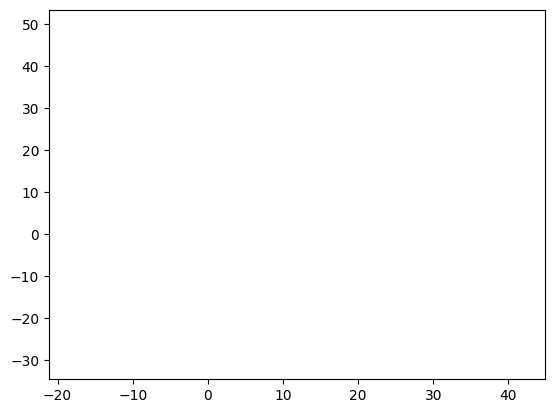

In [54]:
plt.xlim(x_min-10, x_max+10)
plt.ylim(y_min-10, y_max+10)

# Vehicle Analysis

In [55]:
vehicleNum=1

{'id': 0, 'init_cost': 27.0, 'end_cost': 0.0, 'init_density': 1.0, 'end_density': 0.0}
{'id': 2, 'init_cost': 23.0, 'end_cost': 0.36447325348854065, 'init_density': 0.0, 'end_density': 5.0}
{'id': 3, 'init_cost': 11.0, 'end_cost': 100.0, 'init_density': 0.0, 'end_density': 5.0}


C:\Users\hutto\AppData\Local\Temp\ipykernel_45384\12810541.py:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'b-', color=color)
C:\Users\hutto\AppData\Local\Temp\ipykernel_45384\12810541.py:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, y, 'ro', color=color)


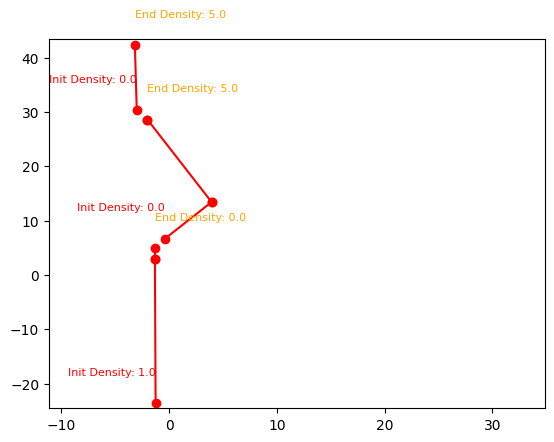

In [56]:
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plotPath(vData[vehicleNum]['path_norm']['path'],'red','orange')	

In [57]:
#metric total costg and density, initial vs end
# init cost and density
init_cost=[]
init_density=[]
# end cost and density
end_cost=[]
end_density=[]

for i in vData[vehicleNum]['path_norm']['path']:
    init_cost.append(i['init_cost'])
    init_density.append(i['init_density'])
    end_cost.append(i['end_cost'])
    end_density.append(i['end_density'])

In [58]:
total_init_cost=0
total_init_density=0
total_end_cost=0
total_end_density=0
total_init_cost = sum(init_cost)
total_init_density = sum(init_density)
total_end_cost = sum(end_cost)
total_end_density = sum(end_density)

norm_table=pd.DataFrame({
    "State": ["Initial", "Final"],
    "Cost":[total_init_cost,total_end_cost],
    "Density":[total_init_density,total_end_density]
})
#print table
print(norm_table)	


     State        Cost  Density
0  Initial   61.000000      1.0
1    Final  100.364473     10.0


In [59]:
## cav

{'id': 0, 'init_cost': 28.0, 'end_cost': 0.0, 'init_density': 1.0, 'end_density': 0.0}
{'id': 2, 'init_cost': 21.0, 'end_cost': 0.0, 'init_density': 0.0, 'end_density': 0.0}
{'id': 3, 'init_cost': 11.0, 'end_cost': 0.0, 'init_density': 0.0, 'end_density': 0.0}
{'id': 0, 'init_cost': 28.0, 'end_cost': 0.36517077684402466, 'init_density': 1.0, 'end_density': 5.0}
{'id': 2, 'init_cost': 21.0, 'end_cost': 1.117273211479187, 'init_density': 1.0, 'end_density': 1.0}
{'id': 3, 'init_cost': 11.0, 'end_cost': 0.0, 'init_density': 1.0, 'end_density': 0.0}


C:\Users\hutto\AppData\Local\Temp\ipykernel_45384\12810541.py:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'b-', color=color)
C:\Users\hutto\AppData\Local\Temp\ipykernel_45384\12810541.py:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, y, 'ro', color=color)


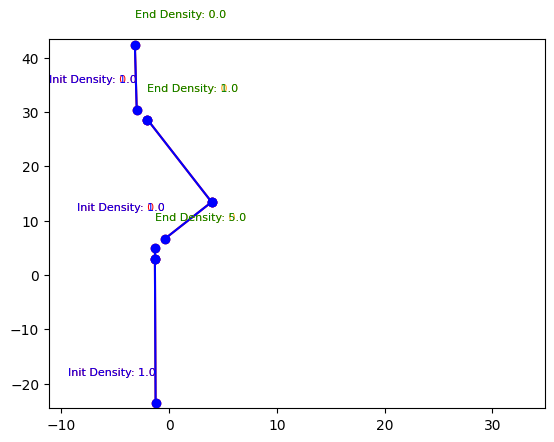

In [60]:
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plotPaths(vData[vehicleNum]['path_cav_init']['path'],vData[vehicleNum]['path_cav_end']['path'])

In [61]:
# CAV init
# init cost and density
ci_init_cost=[]
ci_init_density=[]
# end cost and density
ci_end_cost=[]
ci_end_density=[]

for i in vData[vehicleNum]['path_cav_init']['path']:
    ci_init_cost.append(i['init_cost'])
    ci_init_density.append(i['init_density'])
    ci_end_cost.append(i['end_cost'])
    ci_end_density.append(i['end_density'])

In [62]:
ci_total_init_cost=0
ci_total_init_density=0
ci_total_end_cost=0
ci_total_end_density=0

ci_total_init_cost = sum(ci_init_cost)
ci_total_init_density = sum(ci_init_density)
qi_total_end_cost = sum(ci_end_cost)
ci_total_end_density = sum(ci_end_density)

In [63]:
# end state
# CAV init
# init cost and density
ce_init_cost=[]
ce_init_density=[]
# end cost and density
ce_end_cost=[]
ce_end_density=[]

for i in vData[vehicleNum]['path_cav_end']['path']:
    ce_init_cost.append(i['init_cost'])
    ce_init_density.append(i['init_density'])
    ce_end_cost.append(i['end_cost'])
    ce_end_density.append(i['end_density'])

In [64]:
ce_total_init_cost=0
ce_total_init_density=0
ce_total_end_cost=0
ce_total_end_density=0


ce_total_init_cost = sum(ci_init_cost)
ce_total_init_density = sum(ci_init_density)
qe_total_end_cost = sum(ci_end_cost)
ce_total_end_density = sum(ci_end_density)

In [65]:
# create a table
cav_table=pd.DataFrame({
    "State": ["Initial", "Final"],
    "Cost":[ci_total_init_cost,ci_total_end_cost],
    "Density":[ci_total_init_density,ci_total_end_density]
})
print(cav_table)

     State  Cost  Density
0  Initial  60.0      1.0
1    Final   0.0      0.0


In [66]:
# comparing end cost and densities of ci and ce table
comp_table=pd.DataFrame({
    "State": ["Initial path", "Final path"],
    "Cost":[ci_total_init_cost,ce_total_end_cost],
    "Density":[ci_total_init_density,ce_total_end_density]
})
print(comp_table)

          State  Cost  Density
0  Initial path  60.0      1.0
1    Final path   0.0      0.0


In [67]:
# CAv separate

{'id': 0, 'init_cost': 28.0, 'end_cost': 0.0, 'init_density': 1.0, 'end_density': 0.0}
{'id': 2, 'init_cost': 21.0, 'end_cost': 0.0, 'init_density': 0.0, 'end_density': 0.0}
{'id': 3, 'init_cost': 11.0, 'end_cost': 0.0, 'init_density': 0.0, 'end_density': 0.0}


C:\Users\hutto\AppData\Local\Temp\ipykernel_45384\12810541.py:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'b-', color=color)
C:\Users\hutto\AppData\Local\Temp\ipykernel_45384\12810541.py:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, y, 'ro', color=color)


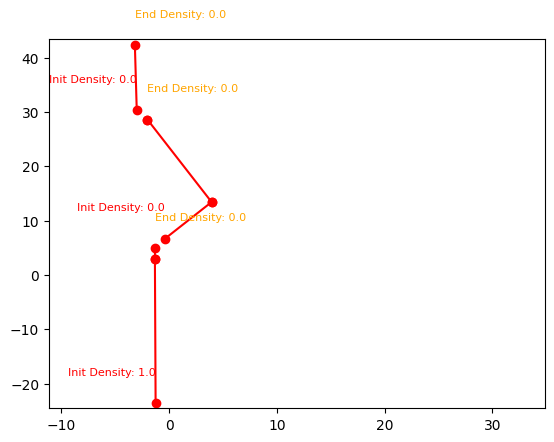

In [68]:
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plotPath(vData[vehicleNum]['path_cav_init']['path'],'red','orange')	

{'id': 0, 'init_cost': 28.0, 'end_cost': 0.36517077684402466, 'init_density': 1.0, 'end_density': 5.0}
{'id': 2, 'init_cost': 21.0, 'end_cost': 1.117273211479187, 'init_density': 1.0, 'end_density': 1.0}
{'id': 3, 'init_cost': 11.0, 'end_cost': 0.0, 'init_density': 1.0, 'end_density': 0.0}


C:\Users\hutto\AppData\Local\Temp\ipykernel_45384\12810541.py:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'b-', color=color)
C:\Users\hutto\AppData\Local\Temp\ipykernel_45384\12810541.py:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, y, 'ro', color=color)


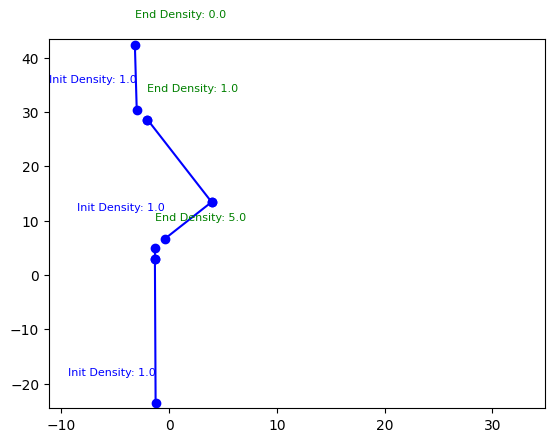

In [69]:
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plotPath(vData[vehicleNum]['path_cav_end']['path'],'blue','green')	

In [70]:
# Metric

In [71]:
# CAV init
# init cost and density
ci_init_cost=[]
ci_init_density=[]
# end cost and density
ci_end_cost=[]
ci_end_density=[]

for i in vData[vehicleNum]['path_cav_init']['path']:
    ci_init_cost.append(i['init_cost'])
    ci_init_density.append(i['init_density'])
    ci_end_cost.append(i['end_cost'])
    ci_end_density.append(i['end_density'])

In [72]:
total_init_cost=0
total_init_density=0
total_end_cost=0
total_end_density=0
total_init_cost = sum(init_cost)
total_init_density = sum(init_density)
total_end_cost = sum(end_cost)
total_end_density = sum(end_density)

norm_table=pd.DataFrame({
    "State": ["Initial", "Final"],
    "Cost":[total_init_cost,total_end_cost],
    "Density":[total_init_density,total_end_density]
})
#print table
print(norm_table)	


     State        Cost  Density
0  Initial   61.000000      1.0
1    Final  100.364473     10.0
